<a href="https://colab.research.google.com/github/akshaya-nagarajan/MachineLearning/blob/master/KMeans_Tensor_Akshaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Machine_Learning/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [15]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt
df = pd.read_csv('/content/gdrive/My Drive/Machine_Learning/AQ_Boston_Cam-Quincy.csv')
df = df.apply(lambda s:s.str.replace('\'', "").str.replace('[', ""))
df.columns = df.columns.str.strip().str.replace('[', '').str.replace(']', '').str.replace('\'','')
df.drop(df.columns[[10,11,12]], axis=1, inplace=True)

# df['location'] = df['location'].astype('category')
# df['location'] = df['location'].cat.codes

c = df['location'].astype('category')
d = dict(enumerate(c.cat.categories))
df['location'] = c.cat.codes

df['local'] = df['local'].astype('category')
df['local'] = df['local'].cat.codes

table = pd.pivot_table(df, values='value', index=['location', 'local'], columns=['parameter'], aggfunc=np.sum, fill_value=0)
table.reset_index(inplace=True)
table.columns = table.columns.str.strip()

def covert_to_float(param):
    table[param] =  table[param].astype(float)

arr = ['co','no2','o3','pm10','pm25','so2']
for i in arr:
    covert_to_float(i)
table.head(5)

parameter,location,local,co,no2,o3,pm10,pm25,so2
0,0,0,0.0,0.008,0.0,0.0,0.0,0.0
1,0,1,0.0,0.009,0.0,0.0,0.0,0.0
2,0,2,0.0,0.008,0.0,0.0,0.0,0.0
3,0,3,0.0,0.008,0.0,0.0,0.0,0.0
4,0,4,0.0,0.007,0.0,0.0,0.0,0.0


centroids [[2.71509062e+02 6.05673759e-03]
 [8.91186579e+01 8.87234043e-03]
 [4.52816134e+02 6.48328488e-03]]


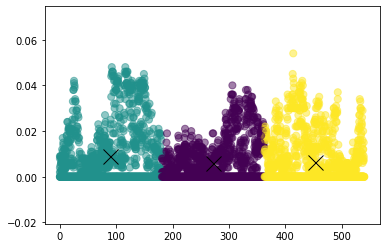

centroids [[4.52816134e+02 1.97194767e-02]
 [2.71509062e+02 1.94310481e-02]
 [8.91186579e+01 1.91088380e-02]]


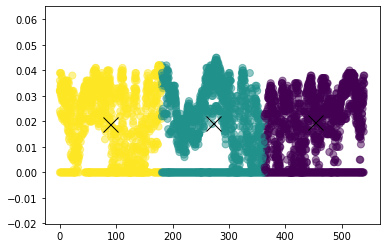

centroids [[1.08833768e-01 1.90735422e-02]
 [5.45334555e+00 2.38166819e-02]
 [1.35407950e+01 1.11464435e-02]]


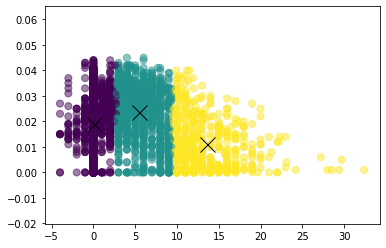

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

#points_n = 200
clusters_n = 3
iteration_n = 100
  
def kmeans_plot(location_num, col_number):
  #points = tf.constant(np.random.uniform(0, 10, (points_n, 2)))
  points = table.iloc[:,[location_num, col_number]].values
  centroids = tf.Variable(tf.slice(tf.random_shuffle(points), [0, 0], [clusters_n, -1]))

  points_expanded = tf.expand_dims(points, 0)
  centroids_expanded = tf.expand_dims(centroids, 1)

  distances = tf.reduce_sum(tf.square(tf.subtract(points_expanded, centroids_expanded)), 2)
  assignments = tf.argmin(distances, 0)

  means = []
  for c in range(clusters_n):
      means.append(tf.reduce_mean(
        tf.gather(points, 
                  tf.reshape(
                    tf.where(
                      tf.equal(assignments, c)
                    ),[1,-1])
                ),reduction_indices=[1]))

  new_centroids = tf.concat(means, 0)

  update_centroids = tf.assign(centroids, new_centroids)
  init = tf.global_variables_initializer()

  data_tf = tf.convert_to_tensor(points, np.float32)

  with tf.Session() as sess:
    sess.run(init)
    for step in range(iteration_n):
      [_, centroid_values, points_values, assignment_values] = sess.run([update_centroids, centroids, data_tf, assignments])
      
    print("centroids", centroid_values)

  plt.scatter(points_values[:, 0], points_values[:, 1], c=assignment_values, s=50, alpha=0.5)
  plt.plot(centroid_values[:, 0], centroid_values[:, 1], 'kx', markersize=15)
  plt.show()


arr_no2 = [1]
for i in arr_no2:
    kmeans_plot(i, 3) 

arr_o3 = [1,6]
for i in arr_o3:
    kmeans_plot(i, 4) 

